In [8]:
import numpy as np

# patches of size n*n
n=7

def mean_cov(patch):
    mean = np.mean(patch)
    var = np.var(patch)
    return np.array([mean,var])

# getting consecuitve pathces of n*n from im
def get_patches(im):
    px = im.load()
    patches = []
    for i in range(0,  im.size[0] - n):
        for j in range(0, im.size[1] - n):
            patch = []
            for k in range(i, i + n):
                for l in range(j, j + n):
                    patch.append(px[k, l])
            patches.append(mean_cov(patch))
    return patches


import random
import numpy as np  # Import the numpy library for np.mean and np.var



# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
# importing required modules

import numpy as np
#import matplotlib.pyplot as plt
import random
import math

# K- MEANS CLUSTERING

# initialization of  mean i.e choose random centeroids

def initilization(data, n_components):
    """
    parameter : 
        data -> class_data in numpy array format
         n_components   -> Number of cluster
    -----------------------------
    return  : initial center for k_mean clustering in list format
    
    """
    np.random.seed(0)
   
    i_mean = []
    i=1
    while i < n_components+1:
        a = random.choice(data)
        i_mean.append(a.tolist())
        #i_mean.append(a)
        i += 1
    
    #print("---  ----  ---  initial",i_mean)
    #print("@@@@@@@")
    return i_mean


# distance between each point and center

def point_assignment_to_cluster(data , initial_mean, n_components):
    """
    parameters : 
        data -> class_data in numpy array format
         n_components   ->  Number of cluster
        initial_mean -> initialization function output i.e. initial mean
    
    return : list containing lists and each inner list contained data_points belonging to corresponding cluster
             
    
    """
    
    # k empty lists
    l = [[] for i in range(n_components)]
    # print(l[1])

    for i in data:
        #print("    for ",i," in data     ")
        lst = []
        for j in initial_mean:
            #print("    for  ",j,"in initial_mean     ")
            d = np.sqrt((i[0]-j[0])**2 +(i[1]-j[1])**2)
           # print("distance.......",d)
            lst.append(d) # [d1,d2,d3....dk]
        #print("distance list--------",lst)
        dist_list = np.array(lst)  
        z = dist_list.argmin()
        #l[z].append(i.tolist())
        l[z].append(i)
    #print("function ending")
    return l

def updated_mean(l):
    """
    parameter : output of point_assignment_to_cluster function
    --------------------------
    return  : updated mean  (list)
    
    calculate mean of each list contained in main list
    """
    #print("update mean started and l is ",l)
    up_mea =[]
    for i in range(len(l)):
        sum1=0
        sum2 =0
        for j in range(len(l[i])):
            #if len(l[i])!=0:               # ----------??????????????????????-----------
            sum1 += l[i][j][0]
            sum2 += l[i][j][1]
        if len(l[i])!=0:
            sum1 = sum1/len(l[i])
            sum2 = sum2 /len(l[i])
        up_mea.append([sum1,sum2])
        
    return up_mea

def  k_means(data , n_components):
    """
    final k_mean function 
    parameters: 
        data -> class_data in numpy array format
         n_components   -> Number of cluster
    --------------------------
    return :
        centroids i.e mean_vector i.e mean of each cluster (list containing mean vector whose dimension is same as number of
           features)
        p -> list containing lists and each inner list contained data_points belonging to a corresponding updated_cluster
    """

    # initialization of  mean
    ini_mean = initilization(data, n_components)
    
    # number of iterations
    iters=10
    
    j = 0
    while j < iters:
        
        if j == 0 :
            latest_mean = ini_mean
        else:
            pass
            #latest_mean = center
        p = point_assignment_to_cluster(data, latest_mean, n_components)
        #print("()()()()()()()      points   ()()()()()()()  ", p)
        #print("()()()()()()()      points   ()()()()()()()"  )

        #print(p)
        center = updated_mean(p)
        #print(">>>>>>>", center)
        latest_mean = center

        #ini_mean = center
        #print(ini_mean)
        j += 1
        
        print("center",center)

    return center , p

In [9]:
# reading all the images
import os
from PIL import Image
path = "./2c/Train/"
images = []
maxImages=1
for filename in os.listdir(path):
    im = Image.open(path + filename)
    images.append(im)
    maxImages-=1
    if(maxImages<0):
        break
print("Number of images:", len(images))

Number of images: 2


In [10]:
# getting path data of each image
data = []
for i in range(len(images)):
    patches = get_patches(images[i])
    data += patches
print("Number of patches:", len(data))


Number of patches: 510050


In [11]:
center,p=k_means(data,3)

center [[228.18215497967105, 17.425828830610765], [228.87652502142464, 3.631317489093617], [178.95342059238894, 70.84435960974393]]
center [[207.48968452898217, 19.40984991507588], [226.5583110765981, 5.036501051819073], [177.82390485817385, 162.2358995083757]]
center [[185.86852581306886, 21.980216059182943], [228.8207878975212, 5.354075675611098], [185.86854141791187, 300.9026043751276]]
center [[182.8036026330964, 31.502351286419817], [228.62965943865944, 5.764980571263276], [183.4961267905471, 395.6268283682211]]
center [[181.9608538320407, 40.13716573654751], [228.26121812524534, 5.72480807075361], [180.93614996063397, 451.74660363123485]]
center [[181.0234217894418, 46.48522427107755], [227.847693130041, 5.727016815785436], [179.91939195760585, 480.89065768912576]]
center [[180.00906479870974, 51.9968002125777], [227.36775347421323, 5.77680978197646], [179.5899536925339, 495.9911537365068]]
center [[179.14292462577524, 57.60554871858198], [226.8460199490355, 5.844401192151962], [

In [12]:
print(center)

[[178.46287239215806, 73.5371991455318], [225.47860308091933, 6.042398213863997], [179.44155759284445, 516.5642720725148]]


In [13]:
def Euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

KeyboardInterrupt: 

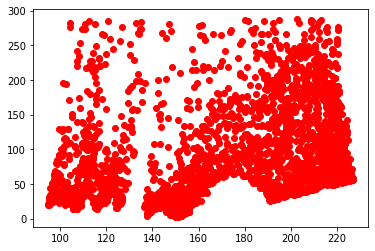

In [15]:
# scatter plot of data points
import matplotlib.pyplot as plt
for i in range(len(p)):
    for j in range(len(p[i])):
        plt.scatter(p[i][j][0],p[i][j][1],color='red')

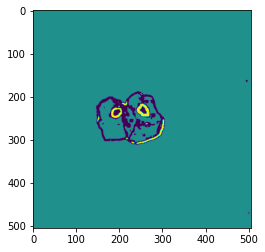

KeyboardInterrupt: 

In [14]:
#using the center to classify the patches
import matplotlib.pyplot as plt
path = "./2c/Test/"
images = []
for filename in os.listdir(path):
    im = Image.open(path + filename)
    images.append(im)

for image in images:
    patches = get_patches(image)
    labels = []
    for patch in patches:
        distances = []
        for cen in center:
            distances.append(Euclidean_distance(patch,cen))
        labels.append(distances.index(min(distances)))
        
    #print(labels)
    labels = np.array(labels)
    labels = labels.reshape(image.size[0]-n,image.size[1]-n)
    plt.imshow(labels)
    plt.show()
